In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from pathlib import Path
from warnings import simplefilter

import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.deterministic import CalendarFourier, DeterministicProcess

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
prwn = pd.read_csv('/kaggle/input/kk-inventory/inventory_consumed.csv', parse_dates=["MOV_DATE"])
prwn  = prwn [prwn ['SKU_NAME'] == 'MEAT - COOKED FROZEN PRAWN IQF 41/50 [700GM/PKT]']
prwn = prwn.groupby(['MOV_DATE', 'SKU_NAME'])['QTY_OUT'].mean().reset_index()

In [3]:
prwn

,MOV_DATE,SKU_NAME,QTY_OUT
0,2024-02-07,MEAT - COOKED FROZEN PRAWN IQF 41/50 [700GM/PKT],1.164167
1,2024-02-08,MEAT - COOKED FROZEN PRAWN IQF 41/50 [700GM/PKT],0.959091
2,2024-02-09,MEAT - COOKED FROZEN PRAWN IQF 41/50 [700GM/PKT],0.000000
3,2024-02-11,MEAT - COOKED FROZEN PRAWN IQF 41/50 [700GM/PKT],1.007273
4,2024-02-12,MEAT - COOKED FROZEN PRAWN IQF 41/50 [700GM/PKT],1.032727
...,...,...,...
172,2024-08-02,MEAT - COOKED FROZEN PRAWN IQF 41/50 [700GM/PKT],1.017500
173,2024-08-03,MEAT - COOKED FROZEN PRAWN IQF 41/50 [700GM/PKT],0.680000
174,2024-08-04,MEAT - COOKED FROZEN PRAWN IQF 41/50 [700GM/PKT],0.704286
175,2024-08-05,MEAT - COOKED FROZEN PRAWN IQF 41/50 [700GM/PKT],0.852857


In [4]:
prwn['Time'] = np.arange(len(prwn.index))

In [5]:
prwn

,MOV_DATE,SKU_NAME,QTY_OUT,Time
0,2024-02-07,MEAT - COOKED FROZEN PRAWN IQF 41/50 [700GM/PKT],1.164167,0
1,2024-02-08,MEAT - COOKED FROZEN PRAWN IQF 41/50 [700GM/PKT],0.959091,1
2,2024-02-09,MEAT - COOKED FROZEN PRAWN IQF 41/50 [700GM/PKT],0.000000,2
3,2024-02-11,MEAT - COOKED FROZEN PRAWN IQF 41/50 [700GM/PKT],1.007273,3
4,2024-02-12,MEAT - COOKED FROZEN PRAWN IQF 41/50 [700GM/PKT],1.032727,4
...,...,...,...,...
172,2024-08-02,MEAT - COOKED FROZEN PRAWN IQF 41/50 [700GM/PKT],1.017500,172
173,2024-08-03,MEAT - COOKED FROZEN PRAWN IQF 41/50 [700GM/PKT],0.680000,173
174,2024-08-04,MEAT - COOKED FROZEN PRAWN IQF 41/50 [700GM/PKT],0.704286,174
175,2024-08-05,MEAT - COOKED FROZEN PRAWN IQF 41/50 [700GM/PKT],0.852857,175


In [6]:
prwn['QTY_OUT'].describe()

count    177.000000
mean       0.734160
std        0.481257
min        0.000000
25%        0.466667
50%        0.839000
75%        1.030000
max        2.756000
Name: QTY_OUT, dtype: float64

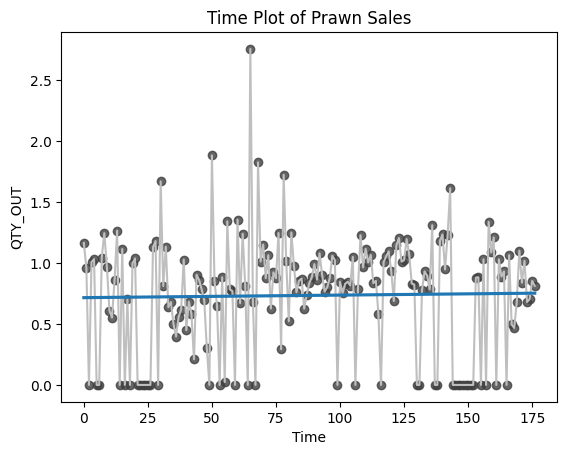

In [7]:
fig, ax = plt.subplots()
ax.plot('Time', 'QTY_OUT', data=prwn, color='0.75')
ax = sns.regplot(x='Time', y='QTY_OUT', data=prwn, ci=None, scatter_kws=dict(color='0.25'))
ax.set_title('Time Plot of Prawn Sales');

In [8]:
from sklearn.linear_model import LinearRegression

# Training data
X = prwn.loc[:, ['Time']]  # features
y = prwn.loc[:, 'QTY_OUT']  # target

# Train the model
model = LinearRegression()
model.fit(X, y)

# Store the fitted values as a time series with the same time index as
# the training data
y_pred = pd.Series(model.predict(X), index=X.index)

In [9]:
# YOUR CODE HERE: Create a lag feature from the target 'sales'
lag_1 = prwn['QTY_OUT'].shift(2)

prwn['lag_1'] = lag_1  # add to dataframe

X = prwn.loc[:, ['lag_1']].dropna()  # features
y = prwn.loc[:, 'QTY_OUT']  # target
y, X = y.align(X, join='inner')  # drop corresponding values in target

# YOUR CODE HERE: Create a LinearRegression instance and fit it to X and y.
model = LinearRegression()
model.fit(X, y)
# YOUR CODE HERE: Create Store the fitted values as a time series with
# the same time index as the training data
y_pred = pd.Series(model.predict(X), index=X.index)

[None,
 Text(0, 0.5, 'qty_out'),
 Text(0.5, 0, 'lag_1'),
 Text(0.5, 1.0, 'Lag Plot of Prawn Sales')]

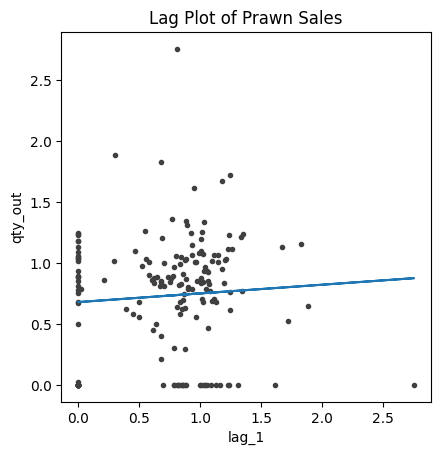

In [10]:
fig, ax = plt.subplots()
ax.plot(X['lag_1'], y, '.', color='0.25')
ax.plot(X['lag_1'], y_pred)
ax.set(aspect='equal', ylabel='qty_out', xlabel='lag_1', title='Lag Plot of Prawn Sales')

In [11]:
prwn['preds'] = y_pred

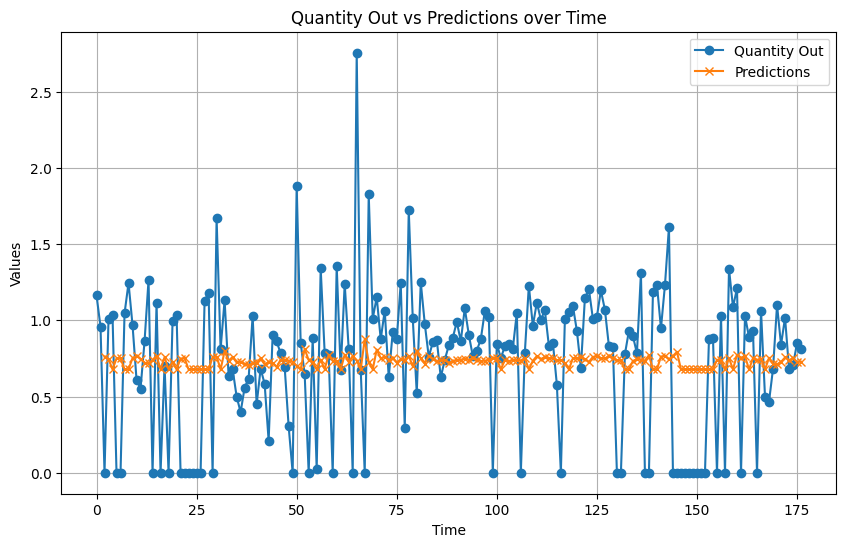

In [12]:
import matplotlib.pyplot as plt

# Plotting
plt.figure(figsize=(10, 6))

# Plot 'qty_out' vs 'time'
plt.plot(prwn['Time'], prwn['QTY_OUT'], label='Quantity Out', marker='o')

# Plot 'preds' vs 'time'
plt.plot(prwn['Time'], prwn['preds'], label='Predictions', marker='x')

# Adding labels and title
plt.xlabel('Time')
plt.ylabel('Values')
plt.title('Quantity Out vs Predictions over Time')

# Adding a legend
plt.legend()

# Optional: adding grid lines for better readability
plt.grid(True)

# Display the plot
plt.show()

**TRENDS**

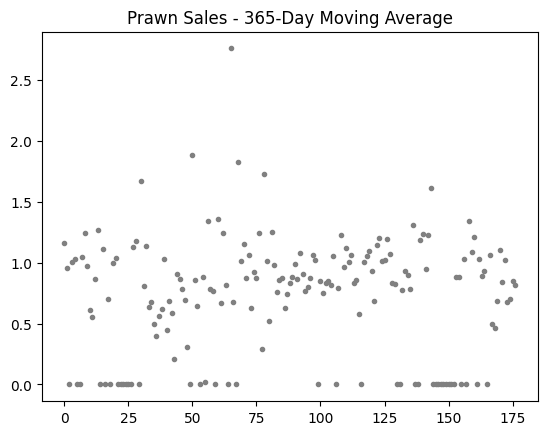

In [13]:
moving_average = prwn['QTY_OUT'].rolling(
    window=365,       # 365-day window
    center=True,      # puts the average at the center of the window
    min_periods=182,  # choose about half the window size
).mean()              # compute the mean (could also do median, std, min, max, ...)

ax = prwn['QTY_OUT'].plot(style=".", color="0.5")
moving_average.plot(
    ax=ax, linewidth=3, title="Prawn Sales - 365-Day Moving Average", legend=False,
);

In [14]:
from statsmodels.tsa.deterministic import DeterministicProcess

dp = DeterministicProcess(
    index=prwn.index,  # dates from the training data
    constant=True,       # dummy feature for the bias (y_intercept)
    order=3,             # the time dummy (trend)
    drop=True,           # drop terms if necessary to avoid collinearity
)
# `in_sample` creates features for the dates given in the `index` argument
X = dp.in_sample()

X.head()

,const,trend,trend_squared,trend_cubed
0,1.0,1.0,1.0,1.0
1,1.0,2.0,4.0,8.0
2,1.0,3.0,9.0,27.0
3,1.0,4.0,16.0,64.0
4,1.0,5.0,25.0,125.0


In [15]:
from sklearn.linear_model import LinearRegression

y = prwn['QTY_OUT']  # the target

# The intercept is the same as the `const` feature from
# DeterministicProcess. LinearRegression behaves badly with duplicated
# features, so we need to be sure to exclude it here.
model = LinearRegression(fit_intercept=False)
model.fit(X, y)

y_pred = pd.Series(model.predict(X), index=X.index)

In [16]:
y_pred

0      0.517879
1      0.525448
2      0.532911
3      0.540269
4      0.547523
         ...   
172    0.608987
173    0.604387
174    0.599751
175    0.595080
176    0.590373
Length: 177, dtype: float64

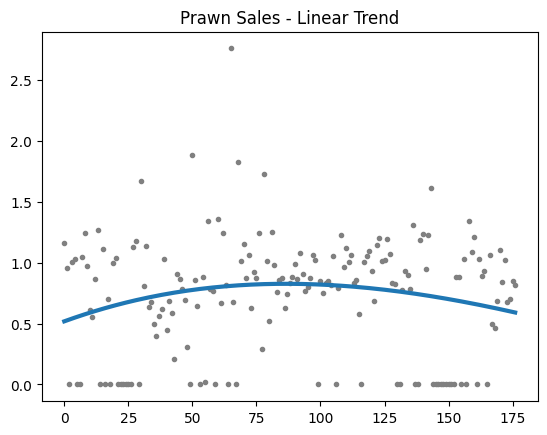

In [17]:
ax = prwn['QTY_OUT'].plot(style=".", color="0.5", title="Prawn Sales - Linear Trend")
_ = y_pred.plot(ax=ax, linewidth=3, label="Trend")

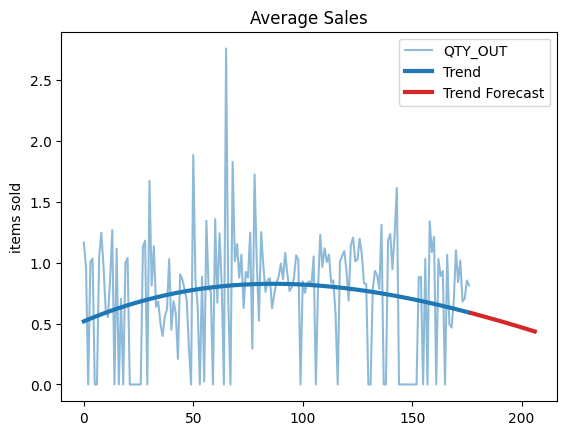

In [18]:
X = dp.out_of_sample(steps=30)

y_fore = pd.Series(model.predict(X), index=X.index)

y_fore.head()

ax = y.plot(alpha=0.5, title="Average Sales", ylabel="items sold")
ax = y_pred.plot(ax=ax, linewidth=3, label="Trend", color='C0')
ax = y_fore.plot(ax=ax, linewidth=3, label="Trend Forecast", color='C3')
ax.legend();

**SEASONS**


In [19]:
from pathlib import Path
from warnings import simplefilter

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.deterministic import CalendarFourier, DeterministicProcess

simplefilter("ignore")

# Set Matplotlib defaults
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True, figsize=(11, 5))
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=16,
    titlepad=10,
)
plot_params = dict(
    color="0.75",
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
    legend=False,
)
%config InlineBackend.figure_format = 'retina'


# annotations: https://stackoverflow.com/a/49238256/5769929
def seasonal_plot(X, y, period, freq, ax=None):
    if ax is None:
        _, ax = plt.subplots()
    palette = sns.color_palette("husl", n_colors=X[period].nunique(),)
    ax = sns.lineplot(
        x=freq,
        y=y,
        hue=period,
        data=X,
        ci=False,
        ax=ax,
        palette=palette,
        legend=False,
    )
    ax.set_title(f"Seasonal Plot ({period}/{freq})")
    for line, name in zip(ax.lines, X[period].unique()):
        y_ = line.get_ydata()[-1]
        ax.annotate(
            name,
            xy=(1, y_),
            xytext=(6, 0),
            color=line.get_color(),
            xycoords=ax.get_yaxis_transform(),
            textcoords="offset points",
            size=14,
            va="center",
        )
    return ax


def plot_periodogram(ts, detrend='linear', ax=None):
    from scipy.signal import periodogram
    fs = pd.Timedelta("365D") / pd.Timedelta("1D")
    freqencies, spectrum = periodogram(
        ts,
        fs=fs,
        detrend=detrend,
        window="boxcar",
        scaling='spectrum',
    )
    if ax is None:
        _, ax = plt.subplots()
    ax.step(freqencies, spectrum, color="purple")
    ax.set_xscale("log")
    ax.set_xticks([1, 2, 4, 6, 12, 26, 52, 104])
    ax.set_xticklabels(
        [
            "Annual (1)",
            "Semiannual (2)",
            "Quarterly (4)",
            "Bimonthly (6)",
            "Monthly (12)",
            "Biweekly (26)",
            "Weekly (52)",
            "Semiweekly (104)",
        ],
        rotation=30,
    )
    ax.ticklabel_format(axis="y", style="sci", scilimits=(0, 0))
    ax.set_ylabel("Variance")
    ax.set_title("Periodogram")
    return ax


In [20]:
pr = pd.read_csv('/kaggle/input/kk-inventory/inventory_consumed.csv', parse_dates=["MOV_DATE"])
pr = pr[pr['SKU_NAME'] == 'MEAT - COOKED FROZEN PRAWN IQF 41/50 [700GM/PKT]']
pr = pr.groupby(['MOV_DATE', 'SKU_NAME'])['QTY_OUT'].mean().reset_index()

In [21]:
pr

,MOV_DATE,SKU_NAME,QTY_OUT
0,2024-02-07,MEAT - COOKED FROZEN PRAWN IQF 41/50 [700GM/PKT],1.164167
1,2024-02-08,MEAT - COOKED FROZEN PRAWN IQF 41/50 [700GM/PKT],0.959091
2,2024-02-09,MEAT - COOKED FROZEN PRAWN IQF 41/50 [700GM/PKT],0.000000
3,2024-02-11,MEAT - COOKED FROZEN PRAWN IQF 41/50 [700GM/PKT],1.007273
4,2024-02-12,MEAT - COOKED FROZEN PRAWN IQF 41/50 [700GM/PKT],1.032727
...,...,...,...
172,2024-08-02,MEAT - COOKED FROZEN PRAWN IQF 41/50 [700GM/PKT],1.017500
173,2024-08-03,MEAT - COOKED FROZEN PRAWN IQF 41/50 [700GM/PKT],0.680000
174,2024-08-04,MEAT - COOKED FROZEN PRAWN IQF 41/50 [700GM/PKT],0.704286
175,2024-08-05,MEAT - COOKED FROZEN PRAWN IQF 41/50 [700GM/PKT],0.852857


In [22]:
pr = pr.set_index("MOV_DATE").to_period("D")

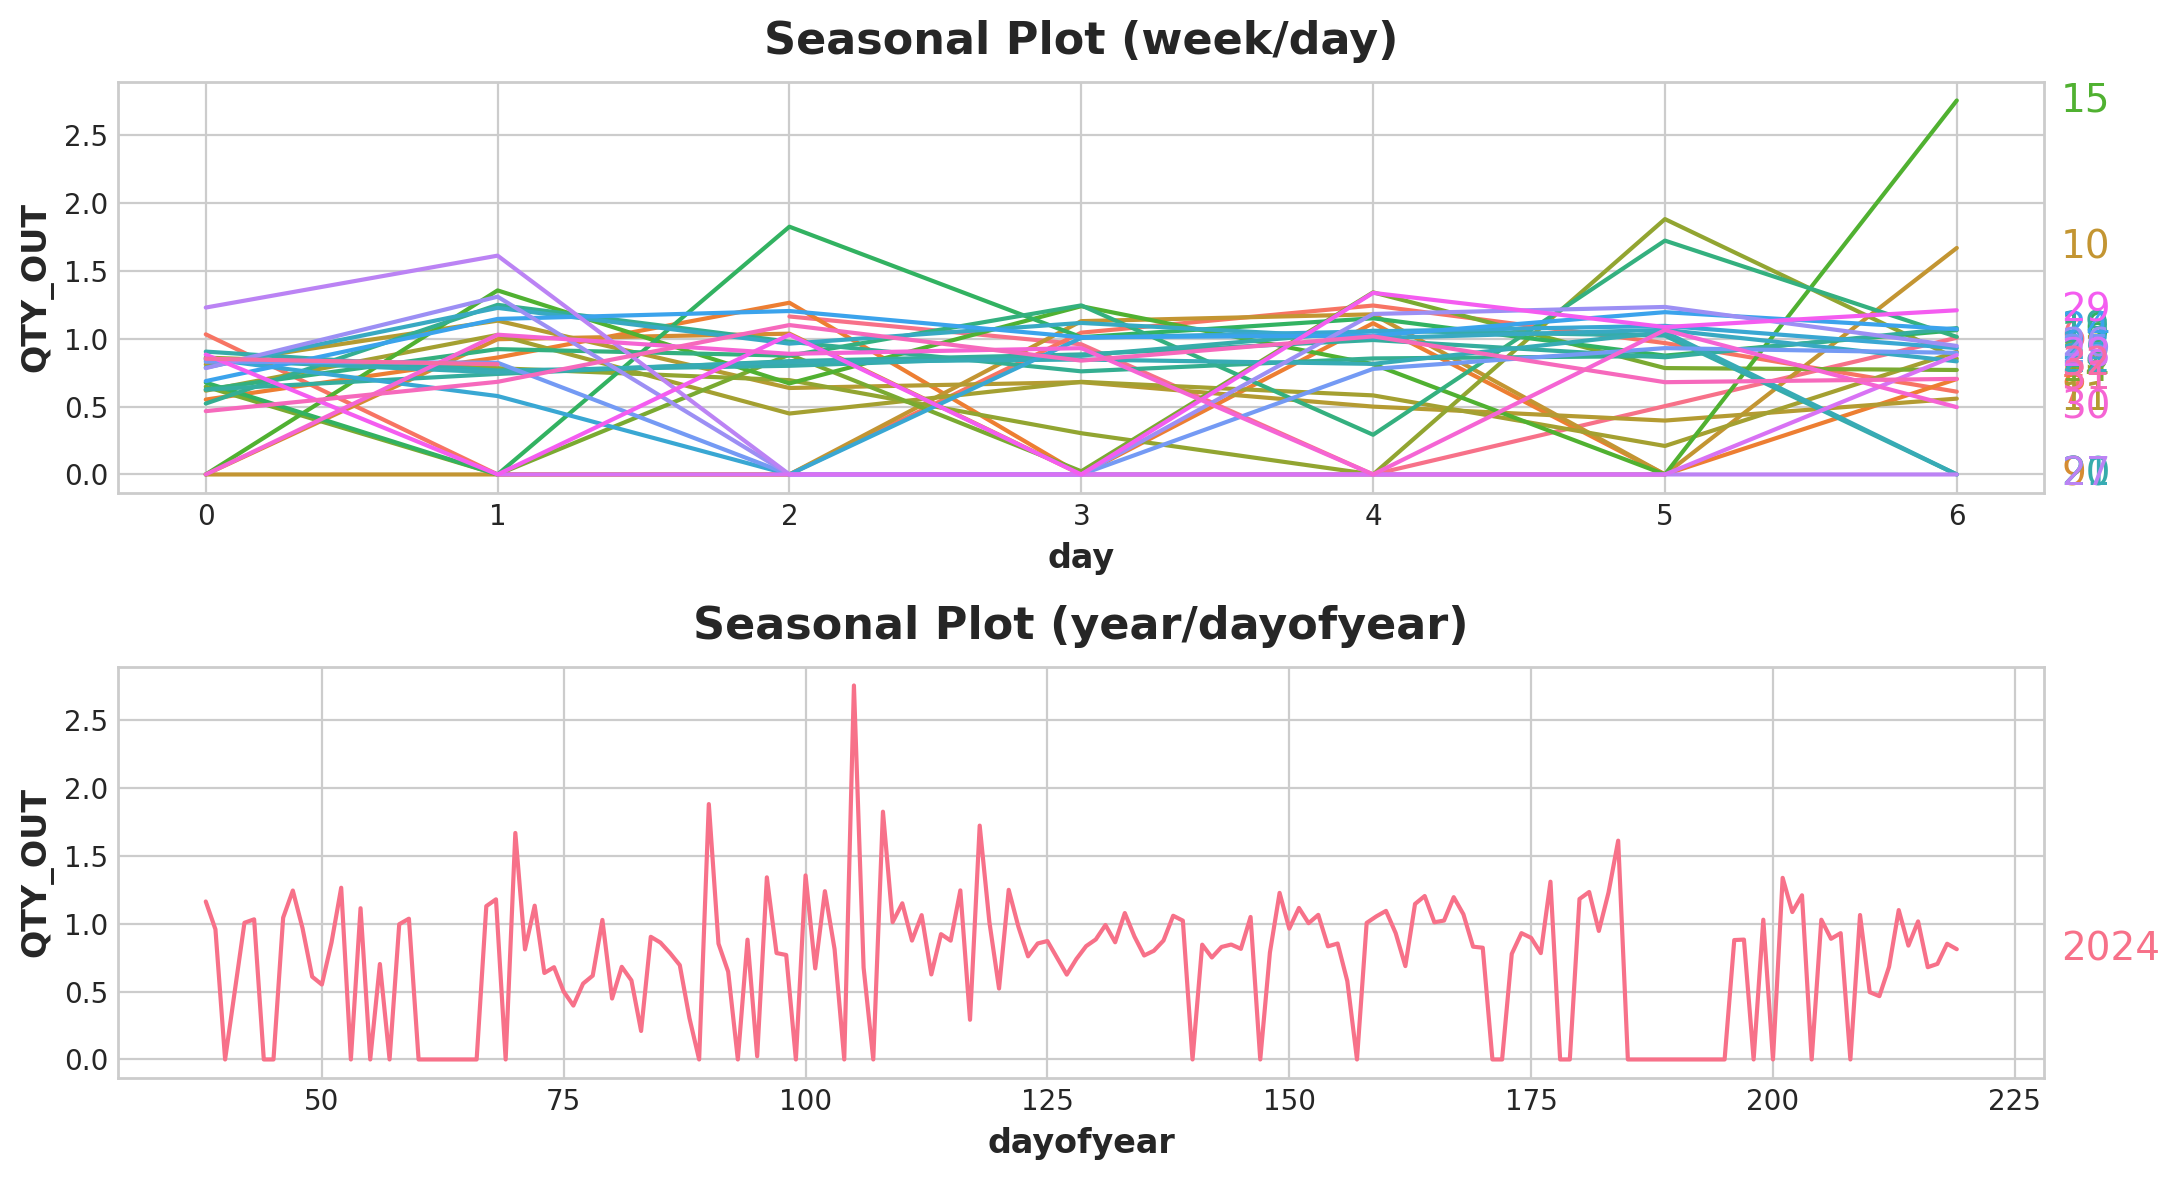

In [23]:
X = pr.copy()

# days within a week
X["day"] = X.index.dayofweek  # the x-axis (freq)
X["week"] = X.index.week  # the seasonal period (period)

# days within a year
X["dayofyear"] = X.index.dayofyear
X["year"] = X.index.year
fig, (ax0, ax1) = plt.subplots(2, 1, figsize=(11, 6))
seasonal_plot(X, y="QTY_OUT", period="week", freq="day", ax=ax0)
seasonal_plot(X, y="QTY_OUT", period="year", freq="dayofyear", ax=ax1);

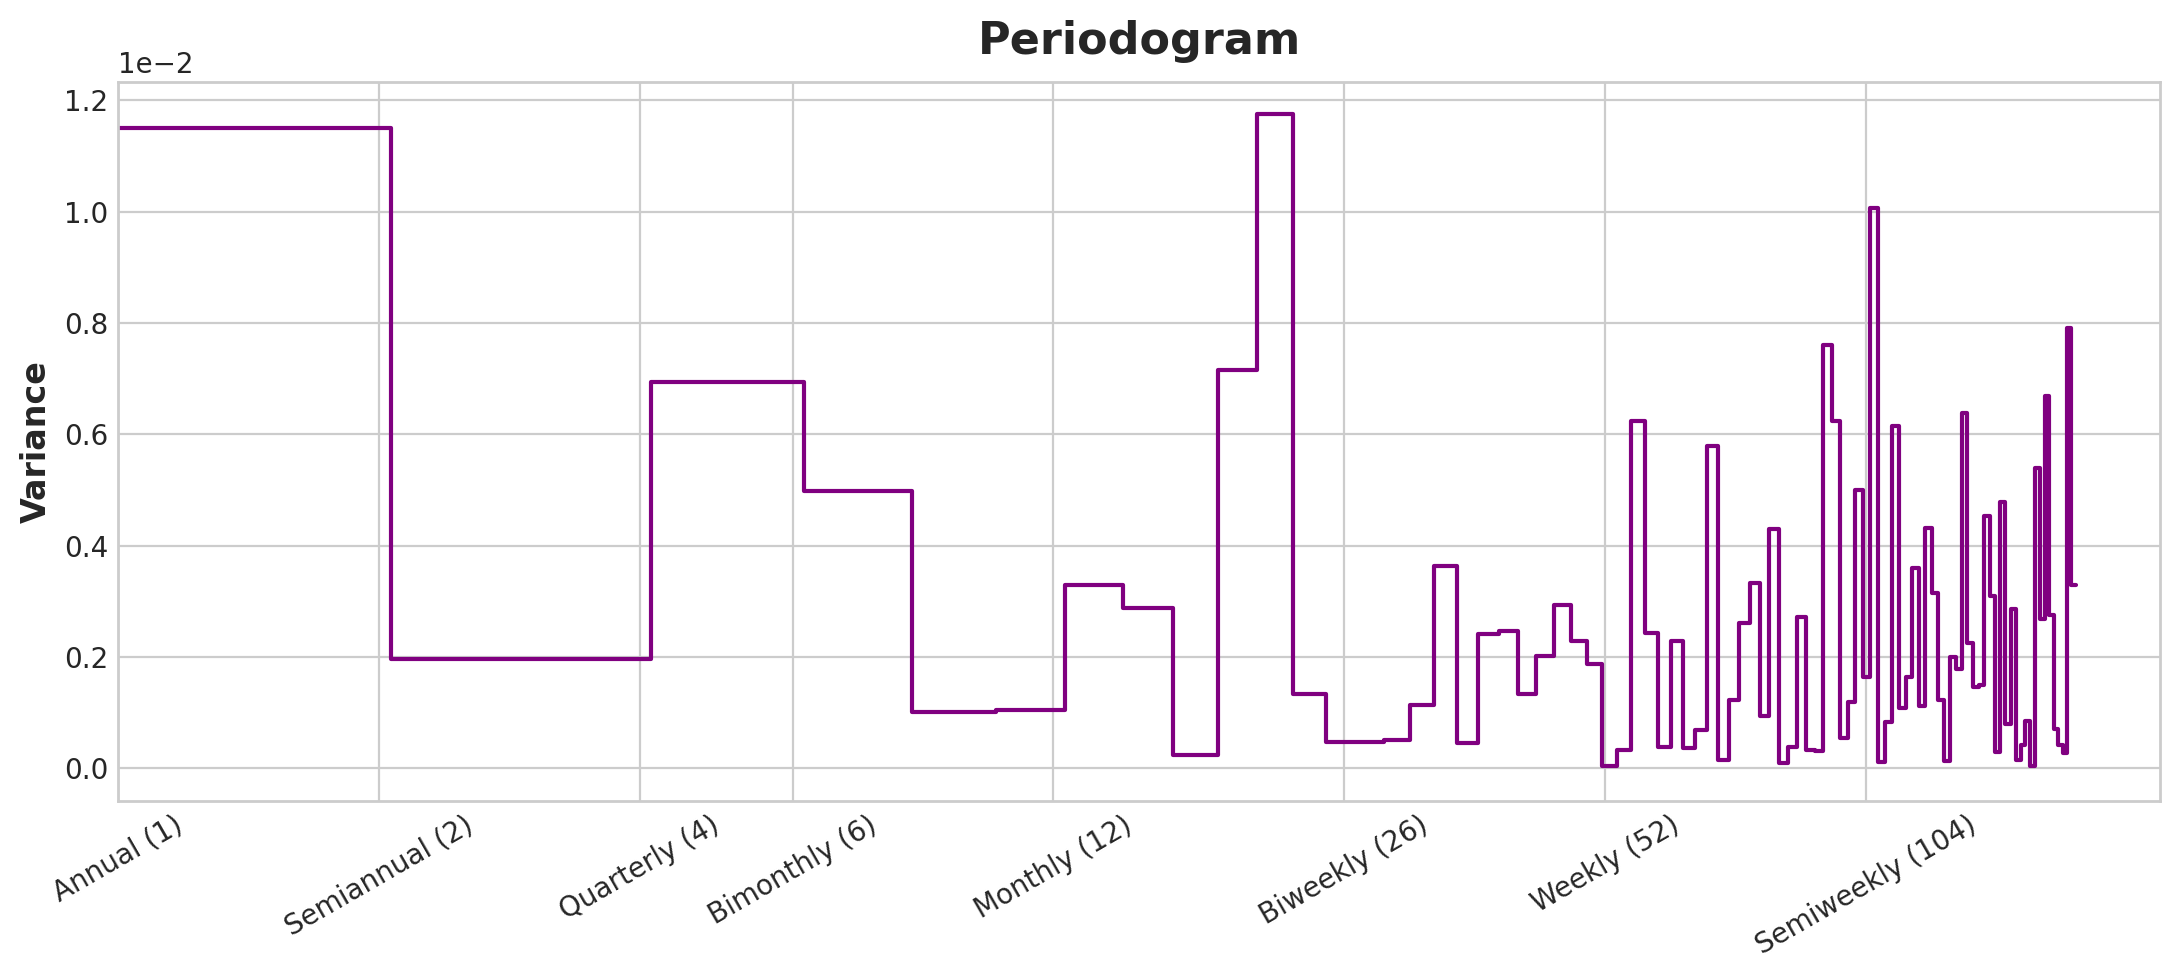

In [24]:
plot_periodogram(pr.QTY_OUT);

In [25]:
from statsmodels.tsa.deterministic import CalendarFourier, DeterministicProcess

fourier = CalendarFourier(freq="W", order=52)  # 10 sin/cos pairs for "A"nnual seasonality

dp = DeterministicProcess(
    index=pr.index,
    constant=True,               # dummy feature for bias (y-intercept)
    order=3,                     # trend (order 1 means linear)
    seasonal=True,               # weekly seasonality (indicators)
    additional_terms=[fourier],  # annual seasonality (fourier)
    drop=True,                   # drop terms to avoid collinearity
)

X = dp.in_sample()  # create features for dates in tunnel.index

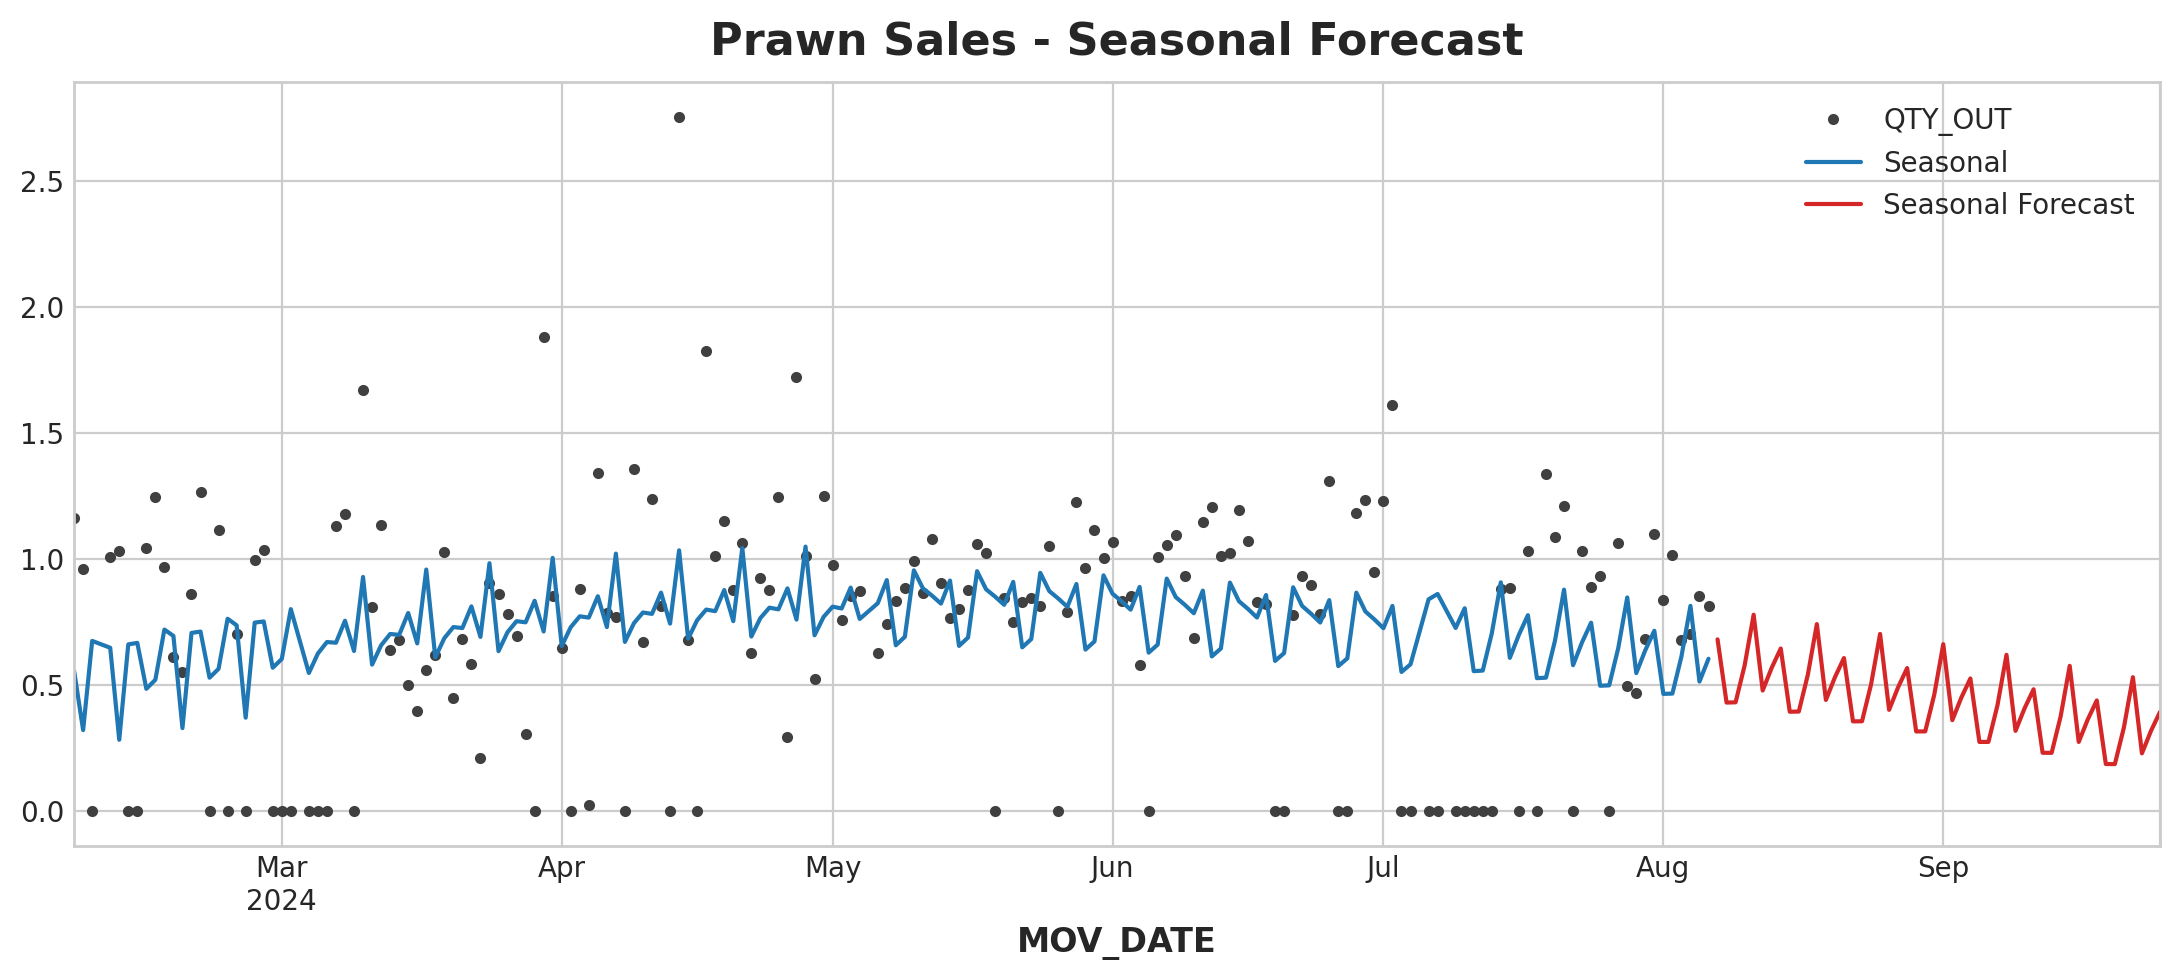

In [26]:
y = pr["QTY_OUT"]

model = LinearRegression(fit_intercept=False)
_ = model.fit(X, y)

y_pred = pd.Series(model.predict(X), index=y.index)
X_fore = dp.out_of_sample(steps=50)
y_fore = pd.Series(model.predict(X_fore), index=X_fore.index)

ax = y.plot(color='0.25', style='.', title="Prawn Sales - Seasonal Forecast")
ax = y_pred.plot(ax=ax, label="Seasonal")
ax = y_fore.plot(ax=ax, label="Seasonal Forecast", color='C3')
_ = ax.legend()

In [27]:
prawn = pd.read_csv('/kaggle/input/kk-inventory/inventory_consumed.csv', parse_dates=["MOV_DATE"])
prawn = prawn[prawn['SKU_NAME'] == 'MEAT - COOKED FROZEN PRAWN IQF 41/50 [700GM/PKT]']
prawn = prawn.groupby(['MOV_DATE'])['QTY_OUT'].mean().sort_index()
prawn = prawn.reset_index()

In [28]:
# Model 1 (trend)
from sklearn.linear_model import ElasticNet, Lasso, Ridge

# Model 2
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor

In [29]:
# import pandas as pd

# # Read the CSV file and parse dates
# meat = pd.read_csv('/kaggle/input/kk-inventory/inventory_consumed.csv', parse_dates=["MOV_DATE"])

# # Filter for 'MEAT' category
# meat = meat[meat['SKU_CAT'] == 'MEAT']

# # Group by 'MOV_DATE' and 'SKU_NAME', then calculate the mean of 'QTY_OUT'
# meat = meat.groupby(['MOV_DATE', 'SKU_NAME'])['QTY_OUT'].mean().reset_index()

# # Pivot the DataFrame to have 'SKU_NAME' as columns
# meat = meat.pivot(index='MOV_DATE', columns='SKU_NAME', values='QTY_OUT')

# # Reset index to make 'MOV_DATE' a column again
# meat= meat.reset_index()

# meat = meat.fillna(0)

# # Optionally, reorder columns if necessary
# # prawn_pivot = prawn_pivot.reindex(columns=['MOV_DATE'] + [col for col in prawn_pivot.columns if col != 'MOV_DATE'])

# meat


In [30]:
# meat = meat.set_index("MOV_DATE").to_period('D')

In [31]:
prawn = prawn.set_index("MOV_DATE").to_period('D')

In [32]:
prawn

,QTY_OUT
MOV_DATE,
2024-02-07,1.164167
2024-02-08,0.959091
2024-02-09,0.000000
2024-02-11,1.007273
2024-02-12,1.032727
...,...
2024-08-02,1.017500
2024-08-03,0.680000
2024-08-04,0.704286


In [33]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from statsmodels.tsa.deterministic import CalendarFourier, DeterministicProcess
from xgboost import XGBRegressor

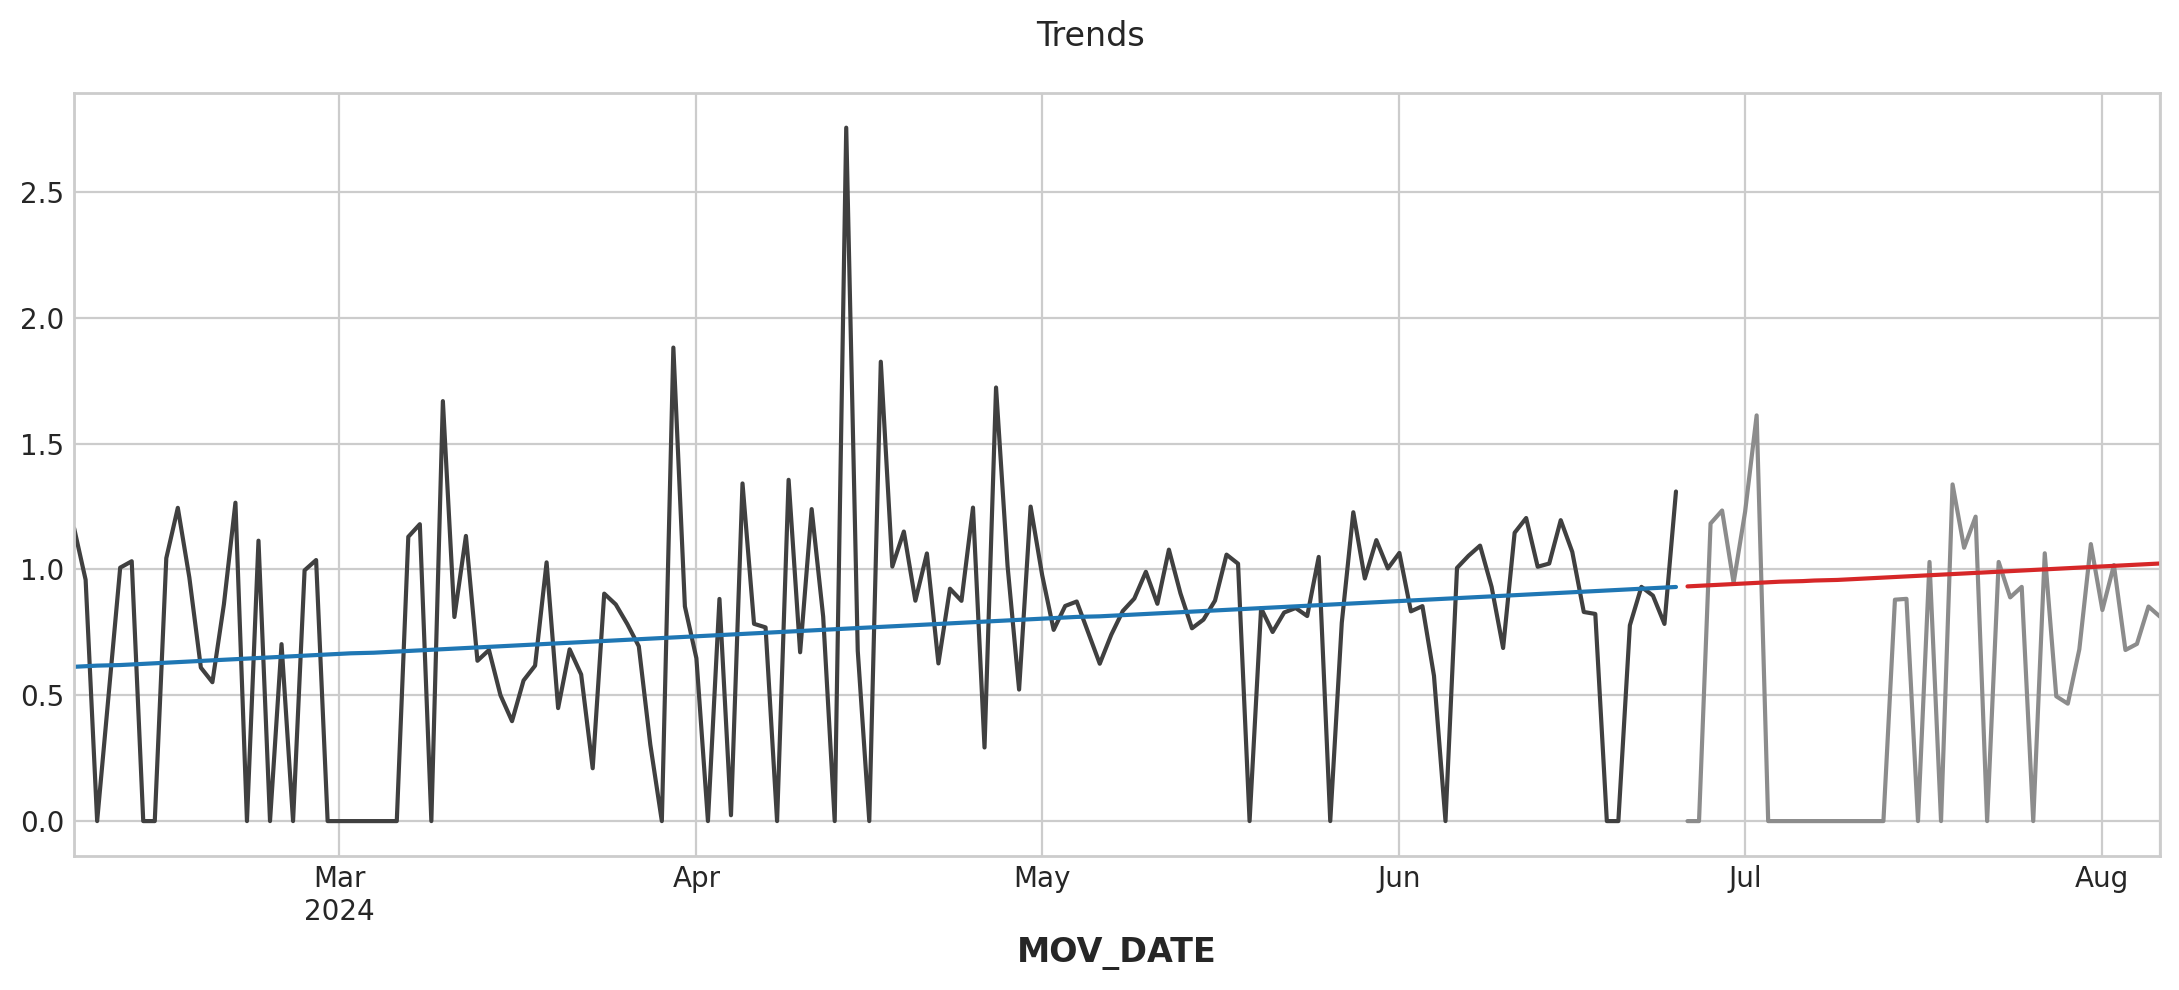

In [34]:
y = prawn.copy()

# Create trend features
dp = DeterministicProcess(
    index=y.index,  # dates from the training data
    constant=True,  # the intercept
    order=1,        # quadratic trend
    drop=True,      # drop terms to avoid collinearity
)
X = dp.in_sample()  # features for the training data

# Test on the years 2016-2019. It will be easier for us later if we
# split the date index instead of the dataframe directly.
idx_train, idx_test = train_test_split(
    y.index, test_size=20 * 2, shuffle=False,
)
X_train, X_test = X.loc[idx_train, :], X.loc[idx_test, :]
y_train, y_test = y.loc[idx_train], y.loc[idx_test]

# Fit trend model
model = LinearRegression(fit_intercept=False)
model.fit(X_train, y_train)

# Make predictions
y_fit = pd.DataFrame(
    model.predict(X_train),
    index=y_train.index,
    columns=y_train.columns,
)
y_pred = pd.DataFrame(
    model.predict(X_test),
    index=y_test.index,
    columns=y_test.columns,
)

# Plot
axs = y_train.plot(color='0.25', subplots=True, sharex=True)
axs = y_test.plot(color='0.55', subplots=True, sharex=True, ax=axs)
axs = y_fit.plot(color='C0', subplots=True, sharex=True, ax=axs)
axs = y_pred.plot(color='C3', subplots=True, sharex=True, ax=axs)
for ax in axs: ax.legend([])
_ = plt.suptitle("Trends")

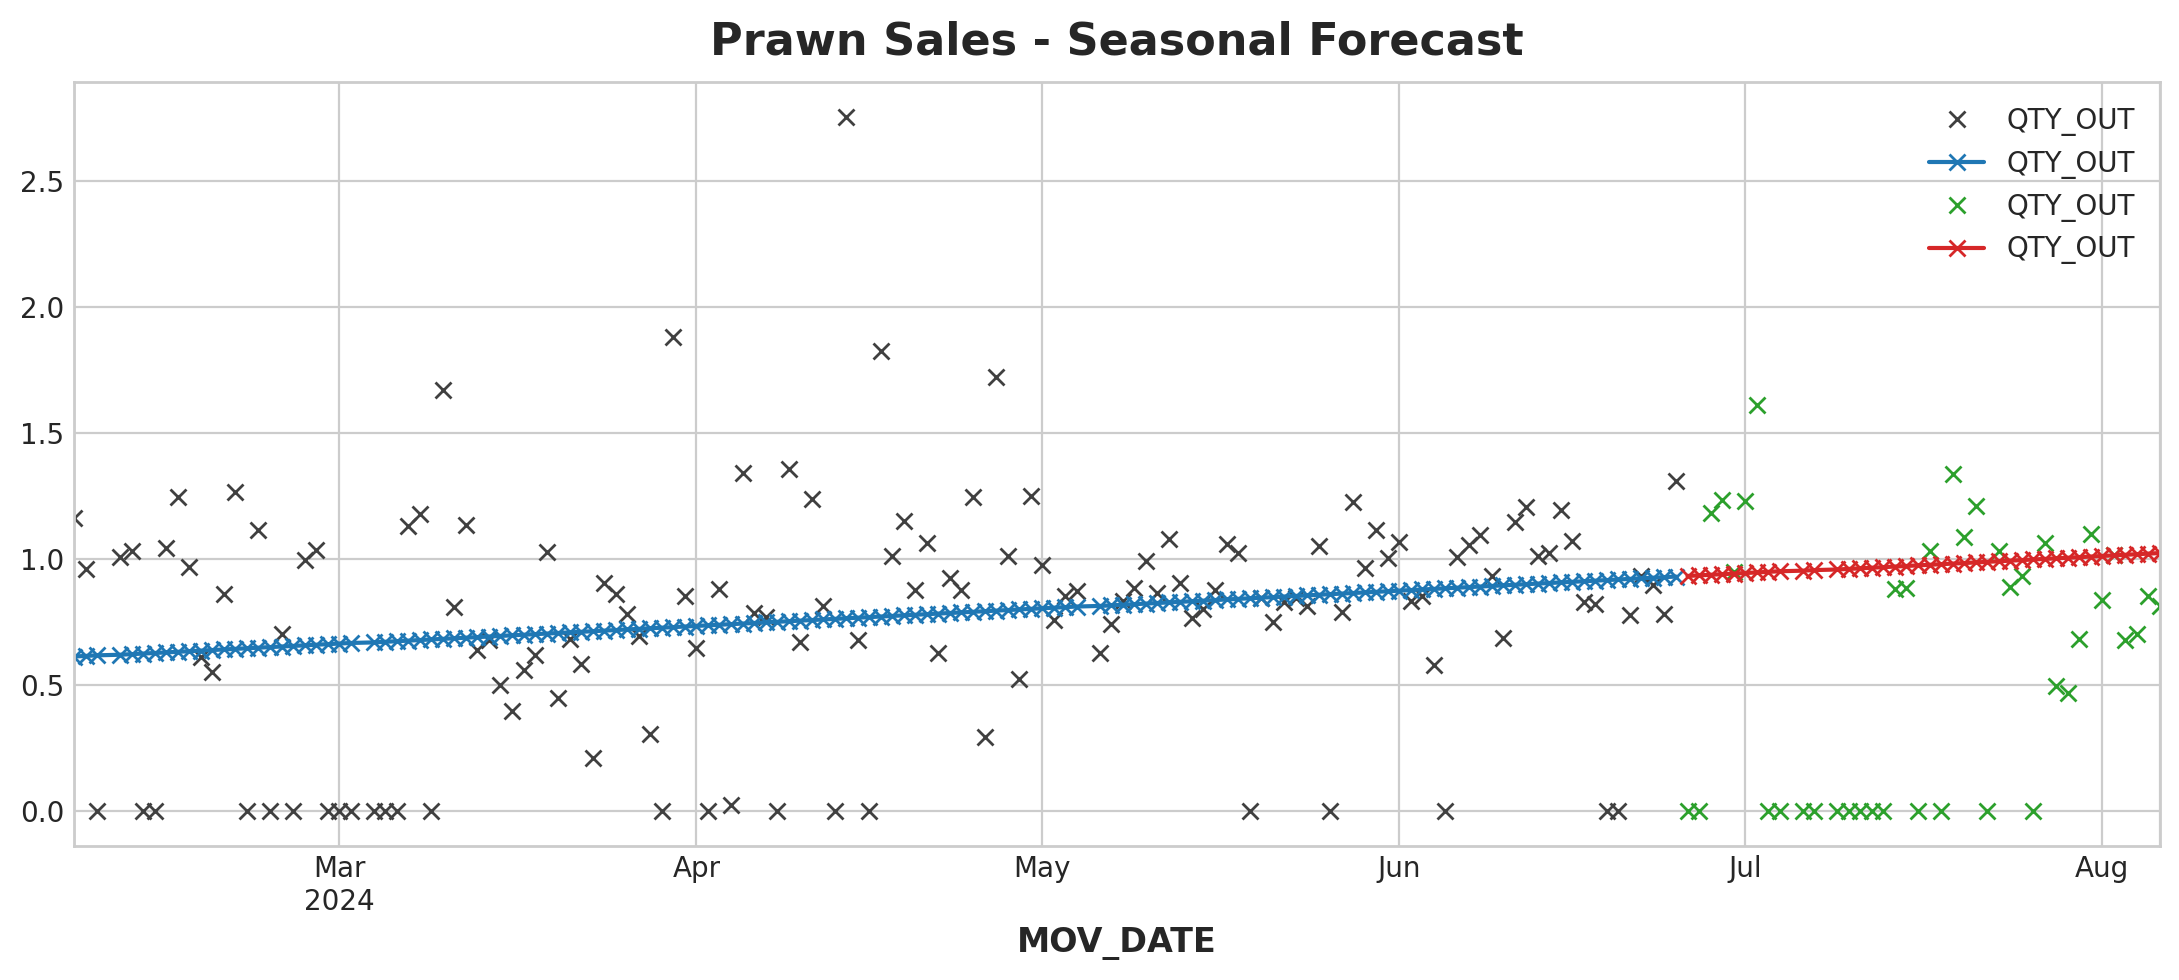

In [35]:
ax = y_train.plot(color='0.25', style='.', title="Prawn Sales - Seasonal Forecast", marker='x')
ax = y_fit.plot(ax=ax, label="Seasonal", marker='x')
ax = y_test.plot(ax=ax, label="test", color='C2', style='.', marker='x')
ax = y_pred.plot(ax=ax, label="Seasonal Forecast", color='C3', marker='x')
_ = ax.legend()

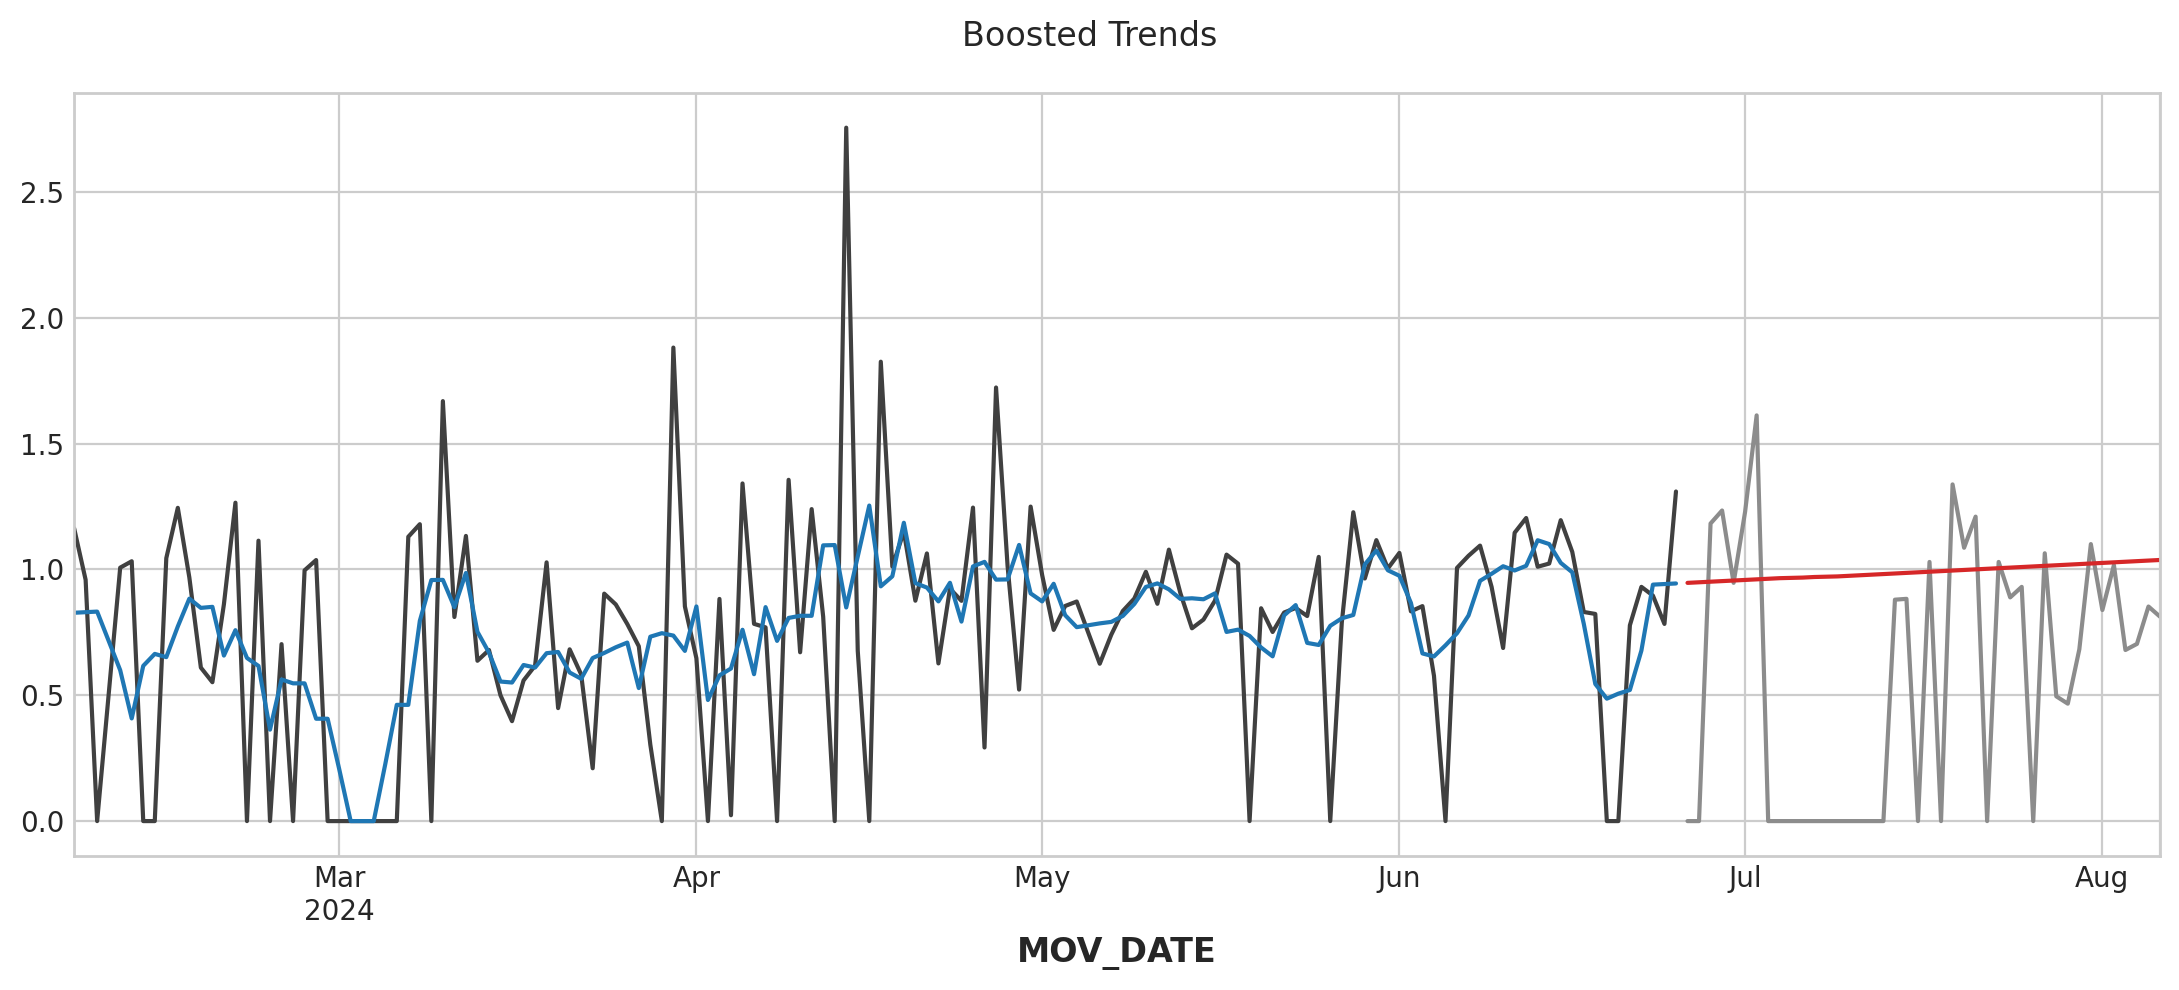

In [36]:
# Create splits for XGBoost
X_train, X_test = X.loc[idx_train, :], X.loc[idx_test, :]
y_train, y_test = y.loc[idx_train], y.loc[idx_test]

# Convert DataFrame to Series for y_fit and y_pred
y_fit = y_fit.squeeze()    # trend from training set
y_pred = y_pred.squeeze()  # trend from test set

# Create residuals (detrended series) from the training set
y_resid = y_train.squeeze() - y_fit
#y_resid = y_train - y_fit

# Train XGBoost on the residuals
xgb = KNeighborsRegressor()
xgb.fit(X_train, y_resid)

# Add the predicted residuals onto the predicted trends
y_fit_boosted = pd.Series(xgb.predict(X_train), index=y_train.index) + y_fit
y_pred_boosted = pd.Series(xgb.predict(X_test), index=y_test.index) + y_pred

# Plot the boosted results
axs = y_train.plot(color='0.25', subplots=True, sharex=True)
axs = y_test.plot(color='0.55', subplots=True, sharex=True, ax=axs)
axs = y_fit_boosted.plot(color='C0', subplots=True, sharex=True, ax=axs)
axs = y_pred_boosted.plot(color='C3', subplots=True, sharex=True, ax=axs)
for ax in axs: ax.legend([])
plt.suptitle("Boosted Trends")
plt.show()

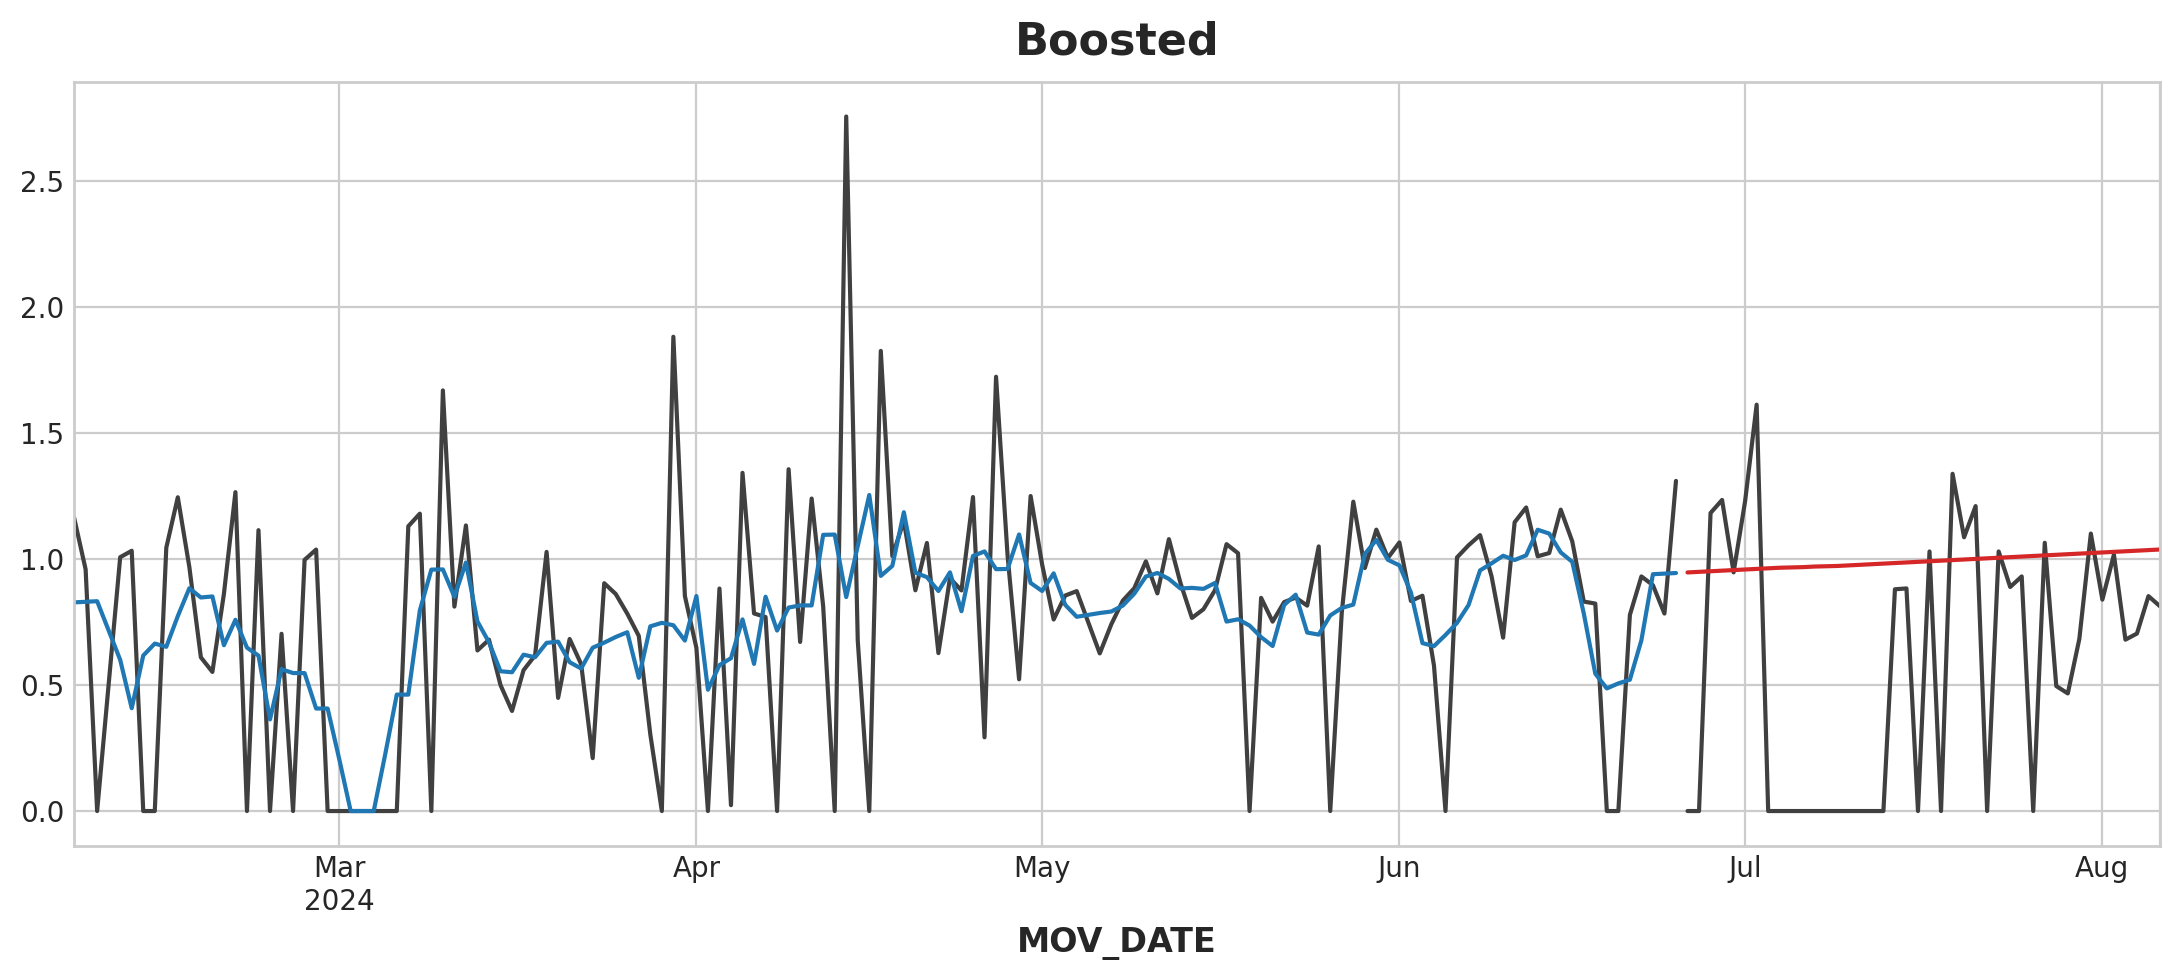

In [37]:
axs = y_train.plot(
    color='0.25', figsize=(11, 5), subplots=True, sharex=True,
    title=['Boosted'],
)
axs = y_test.plot(
    color='0.25', subplots=True, sharex=True, ax=axs,
)
axs = y_fit_boosted.plot(
    color='C0', subplots=True, sharex=True, ax=axs,
)
axs = y_pred_boosted.plot(
    color='C3', subplots=True, sharex=True, ax=axs,
)
for ax in axs: ax.legend([])

In [38]:
# pip install git+https://github.com/amazon-science/chronos-forecasting.git


In [39]:
# pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118


In [40]:
# import torch
# print(torch.cuda.is_available())


In [41]:
# import matplotlib.pyplot as plt
# import numpy as np
# import pandas as pd
# import torch
# from chronos import ChronosPipeline

# model = ChronosPipeline.from_pretrained(
#   "amazon/chronos-t5-tiny",
#   device_map="cuda",
#   torch_dtype=torch.bfloat16,
# )